## Datafun-07-ml
## Introduction to Machine Learning
### Author: Brenda Fuemmeler
### Date: 2-23-25
### https://github.com/bfuemmeler/datafun-07-ml

In [364]:
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [365]:
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os


Part 1- Chart a Straight Line

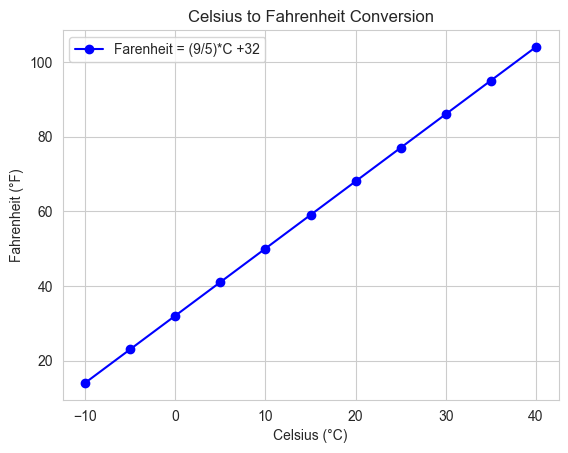

In [366]:
# Celsius values
celsius_values = np.arange(-10, 41, 5)

# Convert Celsius to Fahrenheit
fahrenheit_values = (9/5) * celsius_values + 32

plt.plot(celsius_values, fahrenheit_values, marker='o', color='b', label ='Farenheit = (9/5)*C +32')

#Add labels and title
plt.xlabel('Celsius (°C)')
plt.ylabel('Fahrenheit (°F)')
plt.title('Celsius to Fahrenheit Conversion')

# Display the grid
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

## Part 2- Prediction

### Section 1- Data Acquisition

In [367]:
# Link to the dataset
url = r'C:\Projects\datafun-07-ml\IntroToPython\examples\ch10\ave_hi_nyc_jan_1895-2018.csv'

# Load the dataset from the link into a Dataframe
nyc_df = pd.read_csv(url)

nyc_df['Date']=nyc_df['Date'].astype(int)

# Display first few rows of dataset to verify
print(nyc_df.head())

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0


### Section 2- Data Inspection

In [368]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [369]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3- Data Cleaning

In [370]:
nyc_df.columns = ['Date', 'Temperature', 'Anomoly']

nyc_df.head(3)

,Date,Temperature,Anomoly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


### Section 4- Descriptive Statistics

In [371]:
pd.set_option('display.precision', 2)

nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5- Build the Model

In [389]:
# Perform Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(nyc_df['Date'], nyc_df['Temperature'])

# Print Results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

Slope: 0.014771361132966163
Intercept: 8.694993233674289
R-squared: 0.013674417965163782


In [390]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [391]:
linear_regression.intercept

np.float64(8.694993233674289)

In [392]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

### Section 6- Predict

In [393]:
## Predict temperature for 2024
year_predicted = 2024
predicted_temp = slope * year_predicted + intercept

print(f"Predicted average high temperature in January {year_predicted}: {predicted_temp:.2f}F")

Predicted average high temperature in January 2024: 38.59F


### Section 7: Visualizations

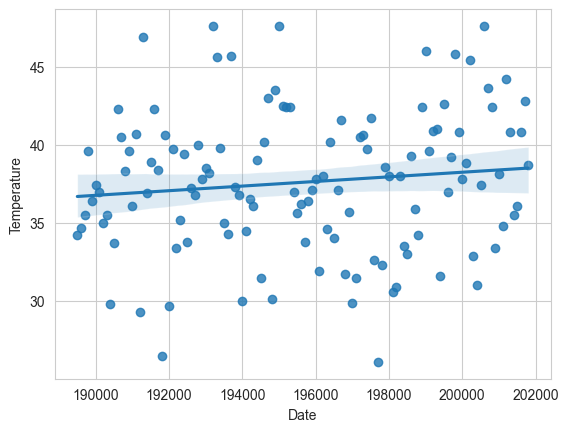

In [377]:
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

In [378]:
axes.set_ylim(10, 70)

(10.0, 70.0)

## Part 3- Prediction

### Section 1- Build the Model

In [379]:
nyc_df.Date=nyc_df.Date.floordiv(100)

nyc_df.head(3)

,Date,Temperature,Anomoly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [380]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)

In [381]:
X_train.shape

(93, 1)

In [382]:
X_test.shape

(31, 1)

In [383]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [384]:
linear_regression.coef_

array([0.01939167])

In [385]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2- Test the Model

In [386]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3- Predict

In [387]:
predict = (lambda x: linear_regression.coef_* x +
                    linear_regression.intercept_)

predict(2024)

array([38.94094855])

### Section 3- Visualizations

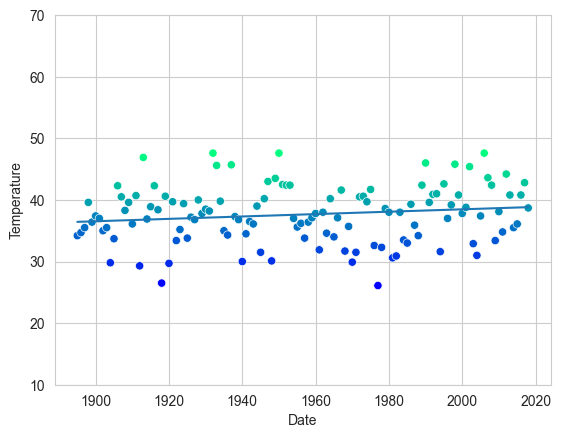

In [388]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

y = predict(x)

line = plt.plot(x, y)


## Part 4- Insights

